# <h><font color="Red">PRINCIPAL COMPONENT ANALYSIS</h>
  

# <h><font color="blue">PCA is one of the old and most important dimensionality reduction technique which is based on idea called variance maximisation based Reduction

***As a part of our Journey,I did my second task as Dimensionality Reduction of 784d data into 2d by using PCA on an interesting data set called SIGNED ALPHABETS MNIST and LINK for data set is***
https://www.kaggle.com/datamunge/sign-language-mnist

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [53]:
data = pd.read_csv("/content/drive/My Drive/Data_Scientist/pca-tsne/sign_mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [54]:
data.shape

(27455, 785)

In [55]:
labels = data['label']
data = data.drop('label',axis= 1)
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [56]:
print(labels.shape)

(27455,)


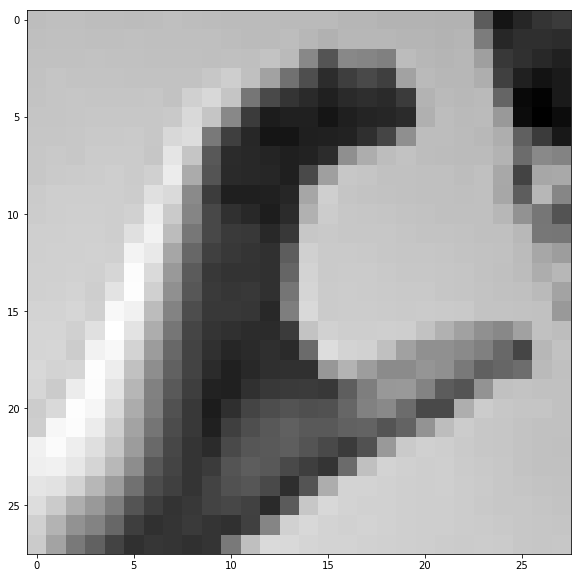

B


In [92]:
plt.figure(figsize=(10,10))
ids = 2

data_matrix = data.iloc[ids].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(data_matrix, interpolation = "none", cmap = "gray")
plt.show()

print(labels[ids])

#  2D Representation and Visualisation using PCA 

In [58]:
data = data.head(15000)
labels = labels.head(15000)
print("The shape of the data becomes",data.shape," and labels become",labels.shape)

The shape of the data becomes (15000, 784)  and labels become (15000,)


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardised_data = scaler.fit_transform(data)
print("The standardised data shape is",standardised_data.shape)

The standardised data shape is (15000, 784)


# Covariance Matrix

***Covariance matrix is used to understand how the variables of input data set are varying from mean wrt to each other or is there any relation ship among one another.***
* It is a Symmetric matrix obtained by X^T * X
* cov(a,a)   ---> var(a)
* cov(xi,yi) ---> sum[(xi-Ux) * (yi-Uy)] where sum means summation over i=1 to n && U means mean
* Covarince matrix is not more than a table that summarises correlation between all possible pairs of variables


In [60]:
resultant_data = standardised_data

# matrix multiplication using numpy
covariance_matrix = np.matmul(resultant_data.T , resultant_data)

print ( "The shape of co_variance matrix = ", covariance_matrix.shape)

The shape of co_variance matrix =  (784, 784)


# What is the use of Eigen Values and Eigen Vectors ?

***Eigen vectors are the unit vectors which gives the direction of gives the direction of maximum spread of the points in that dimension***


![alt text](https://drive.google.com/uc?id=1O1WnSkX13RBocF4lu5q9OsIdUIg5qjvc)

In [61]:
# finding the top two eigen-values and corresponding eigen-vectors 

from scipy.linalg import eigh 

# eigh gives eigen values and vectors in ascending order and eigvals of parameters 782,783 gives top two eigen values 
values, vectors = eigh(covariance_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)

# transposing of vector to give(2,d) dimension
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)

# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [62]:
# projecting the original data sample on the plane 

import matplotlib.pyplot as plt

reshaping_of_original_coordinates = np.matmul(vectors,resultant_data.T)

print (" resultanat new data point's shape ", vectors.shape, "X", data.T.shape," = ", reshaping_of_original_coordinates.shape)

 resultanat new data point's shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [0]:
words_dict ={
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J',
    10:'K',
    11:'L',
    12:'M',
    13:'N',
    14:'O',
    15:'P',
    16:'Q',
    17:'R',
    18:'S',
    19:'T',
    20:'U',
    21:'V',
    22:'W',
    23:'X',
    24:'Y',
    25:'Z'
}

In [73]:
words_dict[1]

'B'

In [84]:
for i in range(len(labels)) :
  if(labels[i] in words_dict.keys()) :
    labels[i] = words_dict[labels[i]]
labels = pd.Series(labels)
print(labels.head())

0    A
1    A
2    B
3    C
4    D
dtype: object


In [85]:
import pandas as pd

# appending label to the data
final_coordinates = np.vstack((reshaping_of_original_coordinates, labels)).T

# Final2d Data set
two_d_data = pd.DataFrame(data=final_coordinates, columns=("1st_principal_component", "2nd_principal_component", "labels"))
print(two_d_data.head())

  1st_principal_component 2nd_principal_component labels
0                0.347344                 4.62431      A
1                -4.45913                 6.69406      A
2                -20.6547               -0.336218      B
3                -20.3266                -9.53171      C
4                -2.89753                -6.60637      D


# Visualising our data using seaborn

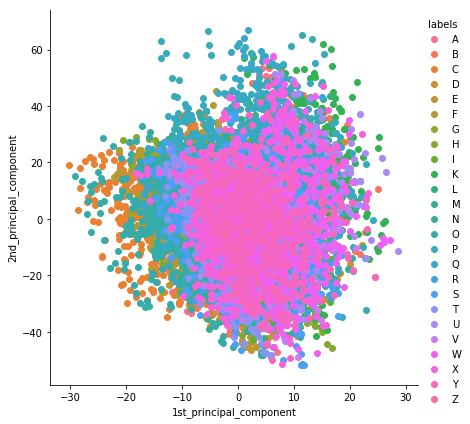

In [87]:
import seaborn as sn
sn.FacetGrid(two_d_data, hue="labels", size=6).map(plt.scatter, '1st_principal_component', '2nd_principal_component').add_legend()
plt.show()

# PCA using Scikit-Learn

***Let's implement same using sklearn's implementation***

In [89]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit_transform(resultant_data)
print("shape of sklearn's pca implemented data's shape = ", pca_data.shape)

shape of sklearn's pca implemented data's shape =  (15000, 2)


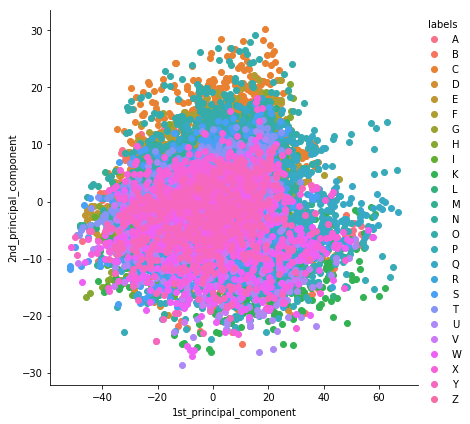

In [90]:
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_resultant_data = pd.DataFrame(data=pca_data, columns=("1st_principal_component", "2nd_principal_component", "labels"))
sns.FacetGrid(pca_resultant_data, hue="labels", size=6).map(plt.scatter, '1st_principal_component', '2nd_principal_component').add_legend()
plt.show()

# PCA estimation using cumulative sum of percentage Variance Share

* lambda_i gives eigen values
* lambda_i/(sum(lambda_i)) gives percentage of variance explained and we plot the cummulative sums of percentage of variances explained

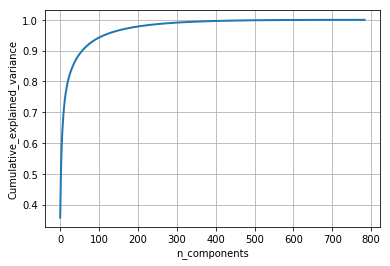

In [91]:
pca.n_components = 784
pca_data = pca.fit_transform(resultant_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

#plotting values of PCA
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


<h><font color="red">CONCLUSIONS :</font></h>
***By just considering only 100 components we preserves 95% of data***

<h><font color="red">LIMITATIONS OF PCA :</font></h>
* Won't work for Sinusoidal data sets
* Won't work for equally distributed data along axis
* Data Loss to some extent